<a href="https://colab.research.google.com/github/Andru-1987/74235-_DataScience_I/blob/main/clase_7/clase_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplos practicos de un modelo de ML

### Clasificacion

Análisis de Churn de Clientes con Machine Learning Supervisado
CHURN -> Utilizando un dataset de Kaggle


In [94]:
dataset_url = "https://raw.githubusercontent.com/Andru-1987/74235-_DataScience_I/refs/heads/main/clase_7/data_store/churn_train.csv"

In [95]:
# Vamos a mirar un poco el dataset -> transformandolo a un formato un poco mas
# amigable : DataFrame
import pandas as pd
df = pd.read_csv(dataset_url)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [97]:
# veamos la cantidad de valores nulos
df.isnull().sum()

,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


#### Entendemos que es una data de muestra
Podemos con esto generar un analisis descriptivo de los mismos y tagear la variable dependiente o `VD`


In [98]:
target = "churn"

In [99]:
df.describe(include="object").T

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [101]:
print(df['churn'].value_counts(normalize=True))

churn
no     0.859294
yes    0.140706
Name: proportion, dtype: float64


Exploracion de datos

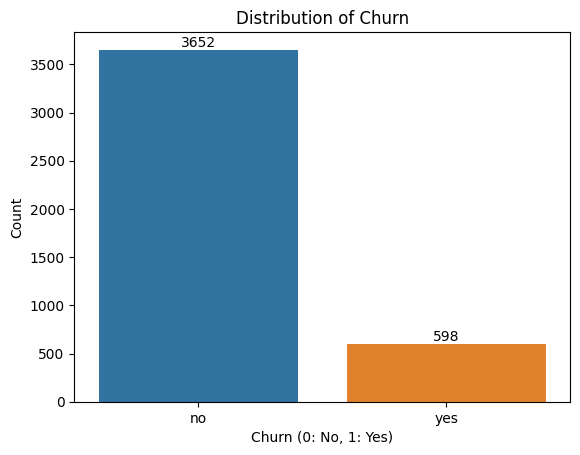

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='churn', hue='churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

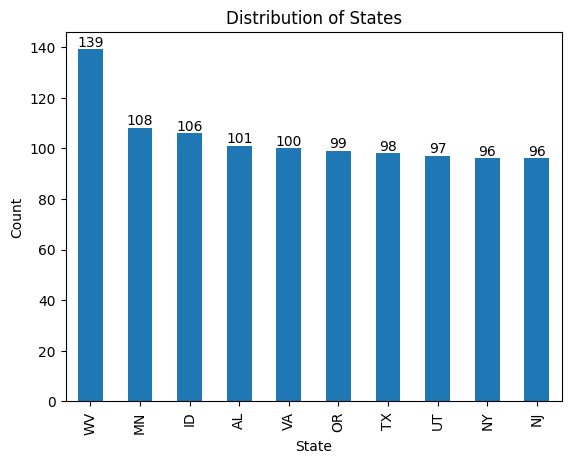

In [103]:
# distribucion por estado

state = df['state'].value_counts()

ax = state[:10].plot(kind='bar')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

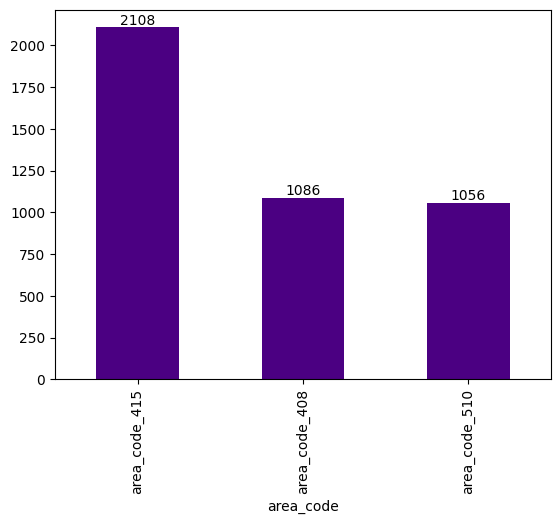

In [104]:
area_code = df['area_code'].value_counts()
ax = area_code.plot(kind='bar', color='indigo')
ax.bar_label(ax.containers[0], fontsize=10);


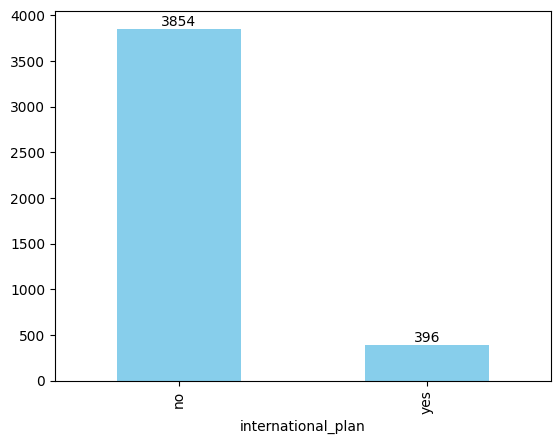

In [105]:
international_plan = df['international_plan'].value_counts()
ax = international_plan.plot(kind='bar', color='skyblue')
ax.bar_label(ax.containers[0], fontsize=10);



Distribucion con datos NO categoricos

In [106]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [107]:
train_num = df.select_dtypes(include = ['float64', 'int64'])
train_num.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


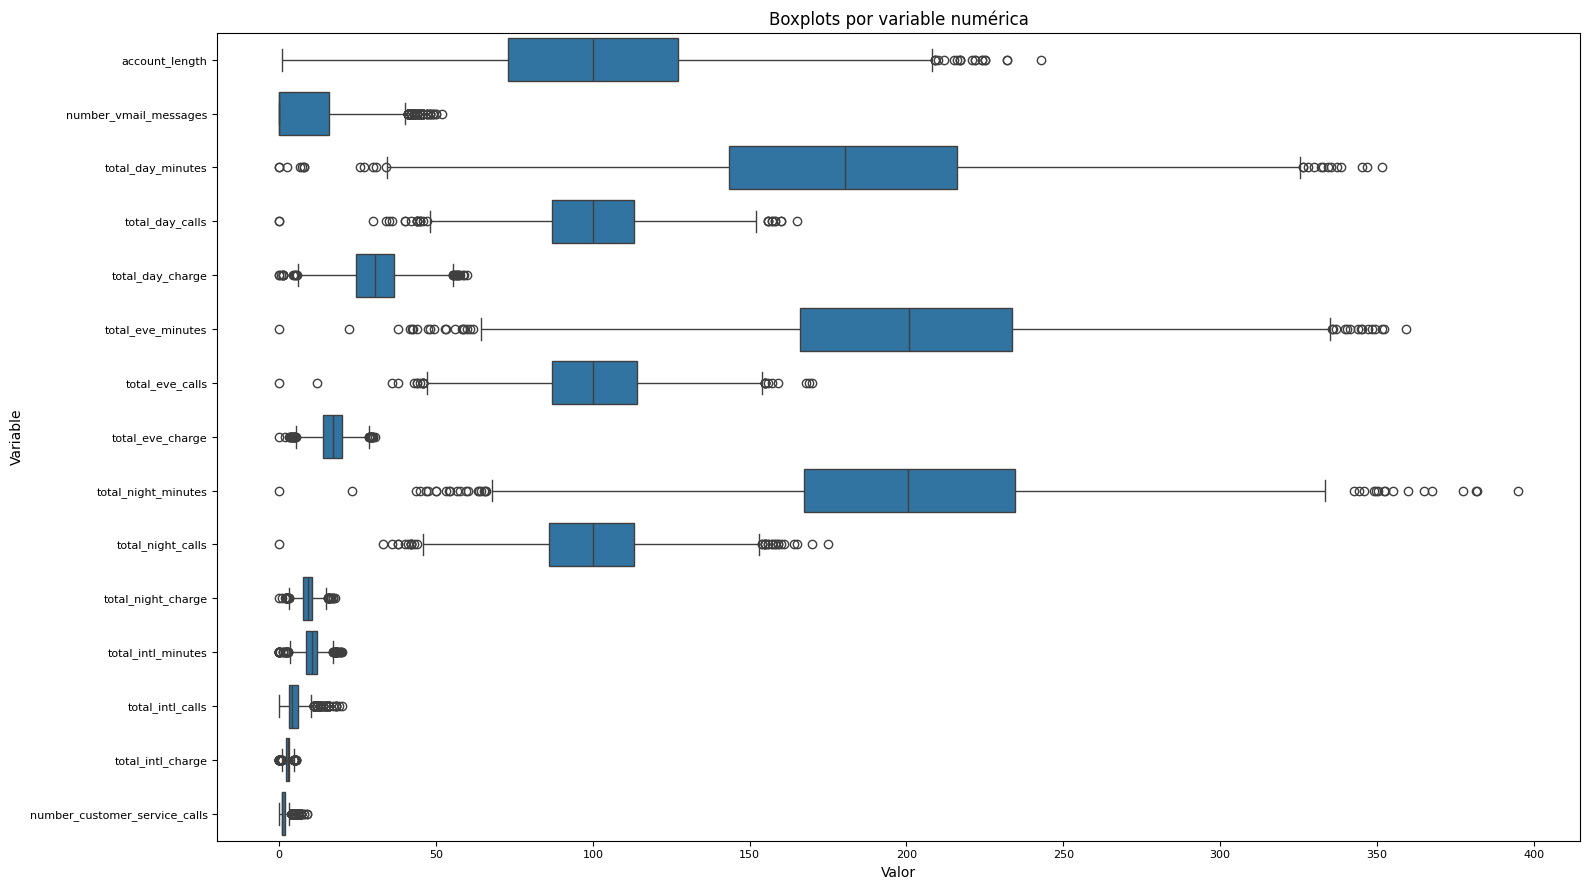

In [108]:
# train_num.plot(kind='box', subplots=True, layout=(5, 4), figsize=(16, 20), fontsize=8)

# Derretimos el DataFrame para usarlo con seaborn
train_num_melted = train_num.melt(var_name="Variable", value_name="Valor")

plt.figure(figsize=(16, 9))
sns.boxplot(data=train_num_melted, x="Valor", y="Variable", orient="h")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Boxplots por variable numérica", fontsize=12)
plt.tight_layout()
plt.show()

### Manejo de Outliers

In [109]:
n = 0

for col in train_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    total = len(df[col][(((df[col] < low_limit)) | (df[col] > high_limit))])
    n = n + total
    print('There are {} row data outlier in {}'.format(total, col))



There are 20 row data outlier in account_length
There are 86 row data outlier in number_vmail_messages
There are 25 row data outlier in total_day_minutes
There are 28 row data outlier in total_day_calls
There are 26 row data outlier in total_day_charge
There are 34 row data outlier in total_eve_minutes
There are 24 row data outlier in total_eve_calls
There are 34 row data outlier in total_eve_charge
There are 37 row data outlier in total_night_minutes
There are 33 row data outlier in total_night_calls
There are 37 row data outlier in total_night_charge
There are 62 row data outlier in total_intl_minutes
There are 100 row data outlier in total_intl_calls
There are 62 row data outlier in total_intl_charge
There are 335 row data outlier in number_customer_service_calls


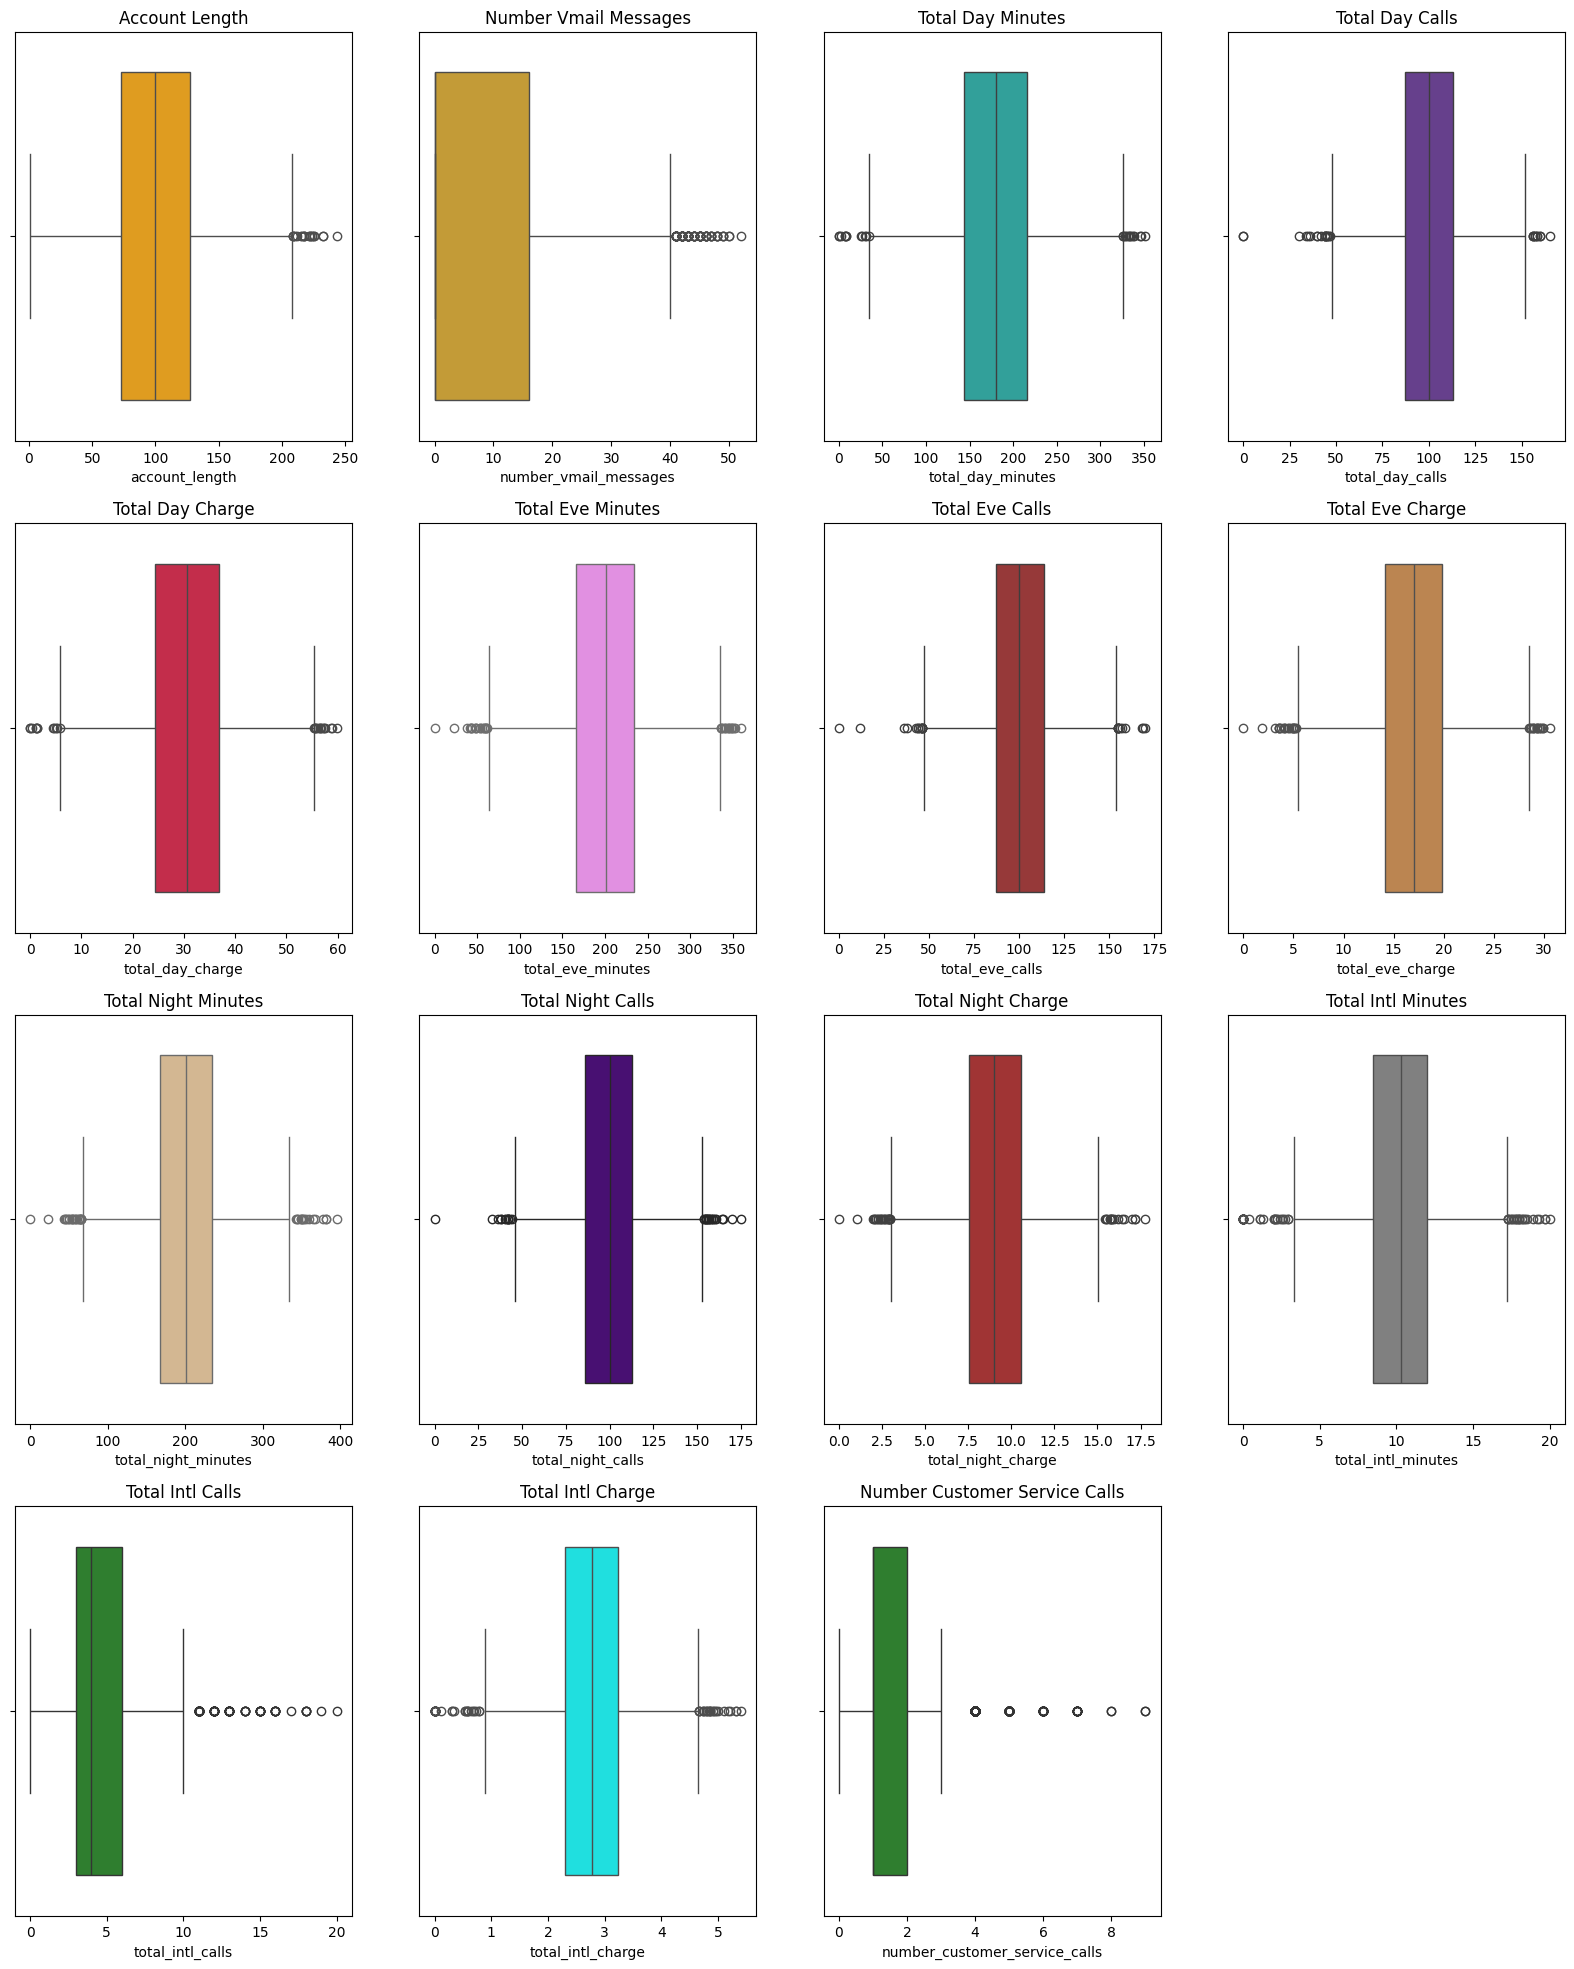

In [110]:
import re

colour_list = ['orange','goldenrod', 'lightseagreen', 'rebeccapurple', 'crimson', 'violet', 'brown', 'peru', 'burlywood', 'indigo',
           'firebrick', 'gray', 'forestgreen', 'cyan', 'forestgreen']
fig = plt.figure(figsize=[20,50])
for i, col in enumerate(train_num):
    ax = fig.add_subplot(8,4, i+1)
    ax = sns.boxplot(data = df, x=col, color=colour_list[i])
    title = re.sub('_', ' ', col.title())
    ax.set_title(title)
    ax.set_xlabel(col)

In [111]:
n = 0
for col in train_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    df[col] = df[col].apply(lambda x: high_limit if x > high_limit else (low_limit if x < low_limit else x))
    total = len(df[col][(((df[col] < low_limit)) | (df[col] > high_limit))])
    n = n + total
    print('There are {} row data outlier in columns (variables) {}'.format(total, col))

There are 0 row data outlier in columns (variables) account_length
There are 0 row data outlier in columns (variables) number_vmail_messages
There are 0 row data outlier in columns (variables) total_day_minutes
There are 0 row data outlier in columns (variables) total_day_calls
There are 0 row data outlier in columns (variables) total_day_charge
There are 0 row data outlier in columns (variables) total_eve_minutes
There are 0 row data outlier in columns (variables) total_eve_calls
There are 0 row data outlier in columns (variables) total_eve_charge
There are 0 row data outlier in columns (variables) total_night_minutes
There are 0 row data outlier in columns (variables) total_night_calls
There are 0 row data outlier in columns (variables) total_night_charge
There are 0 row data outlier in columns (variables) total_intl_minutes
There are 0 row data outlier in columns (variables) total_intl_calls
There are 0 row data outlier in columns (variables) total_intl_charge
There are 0 row data o

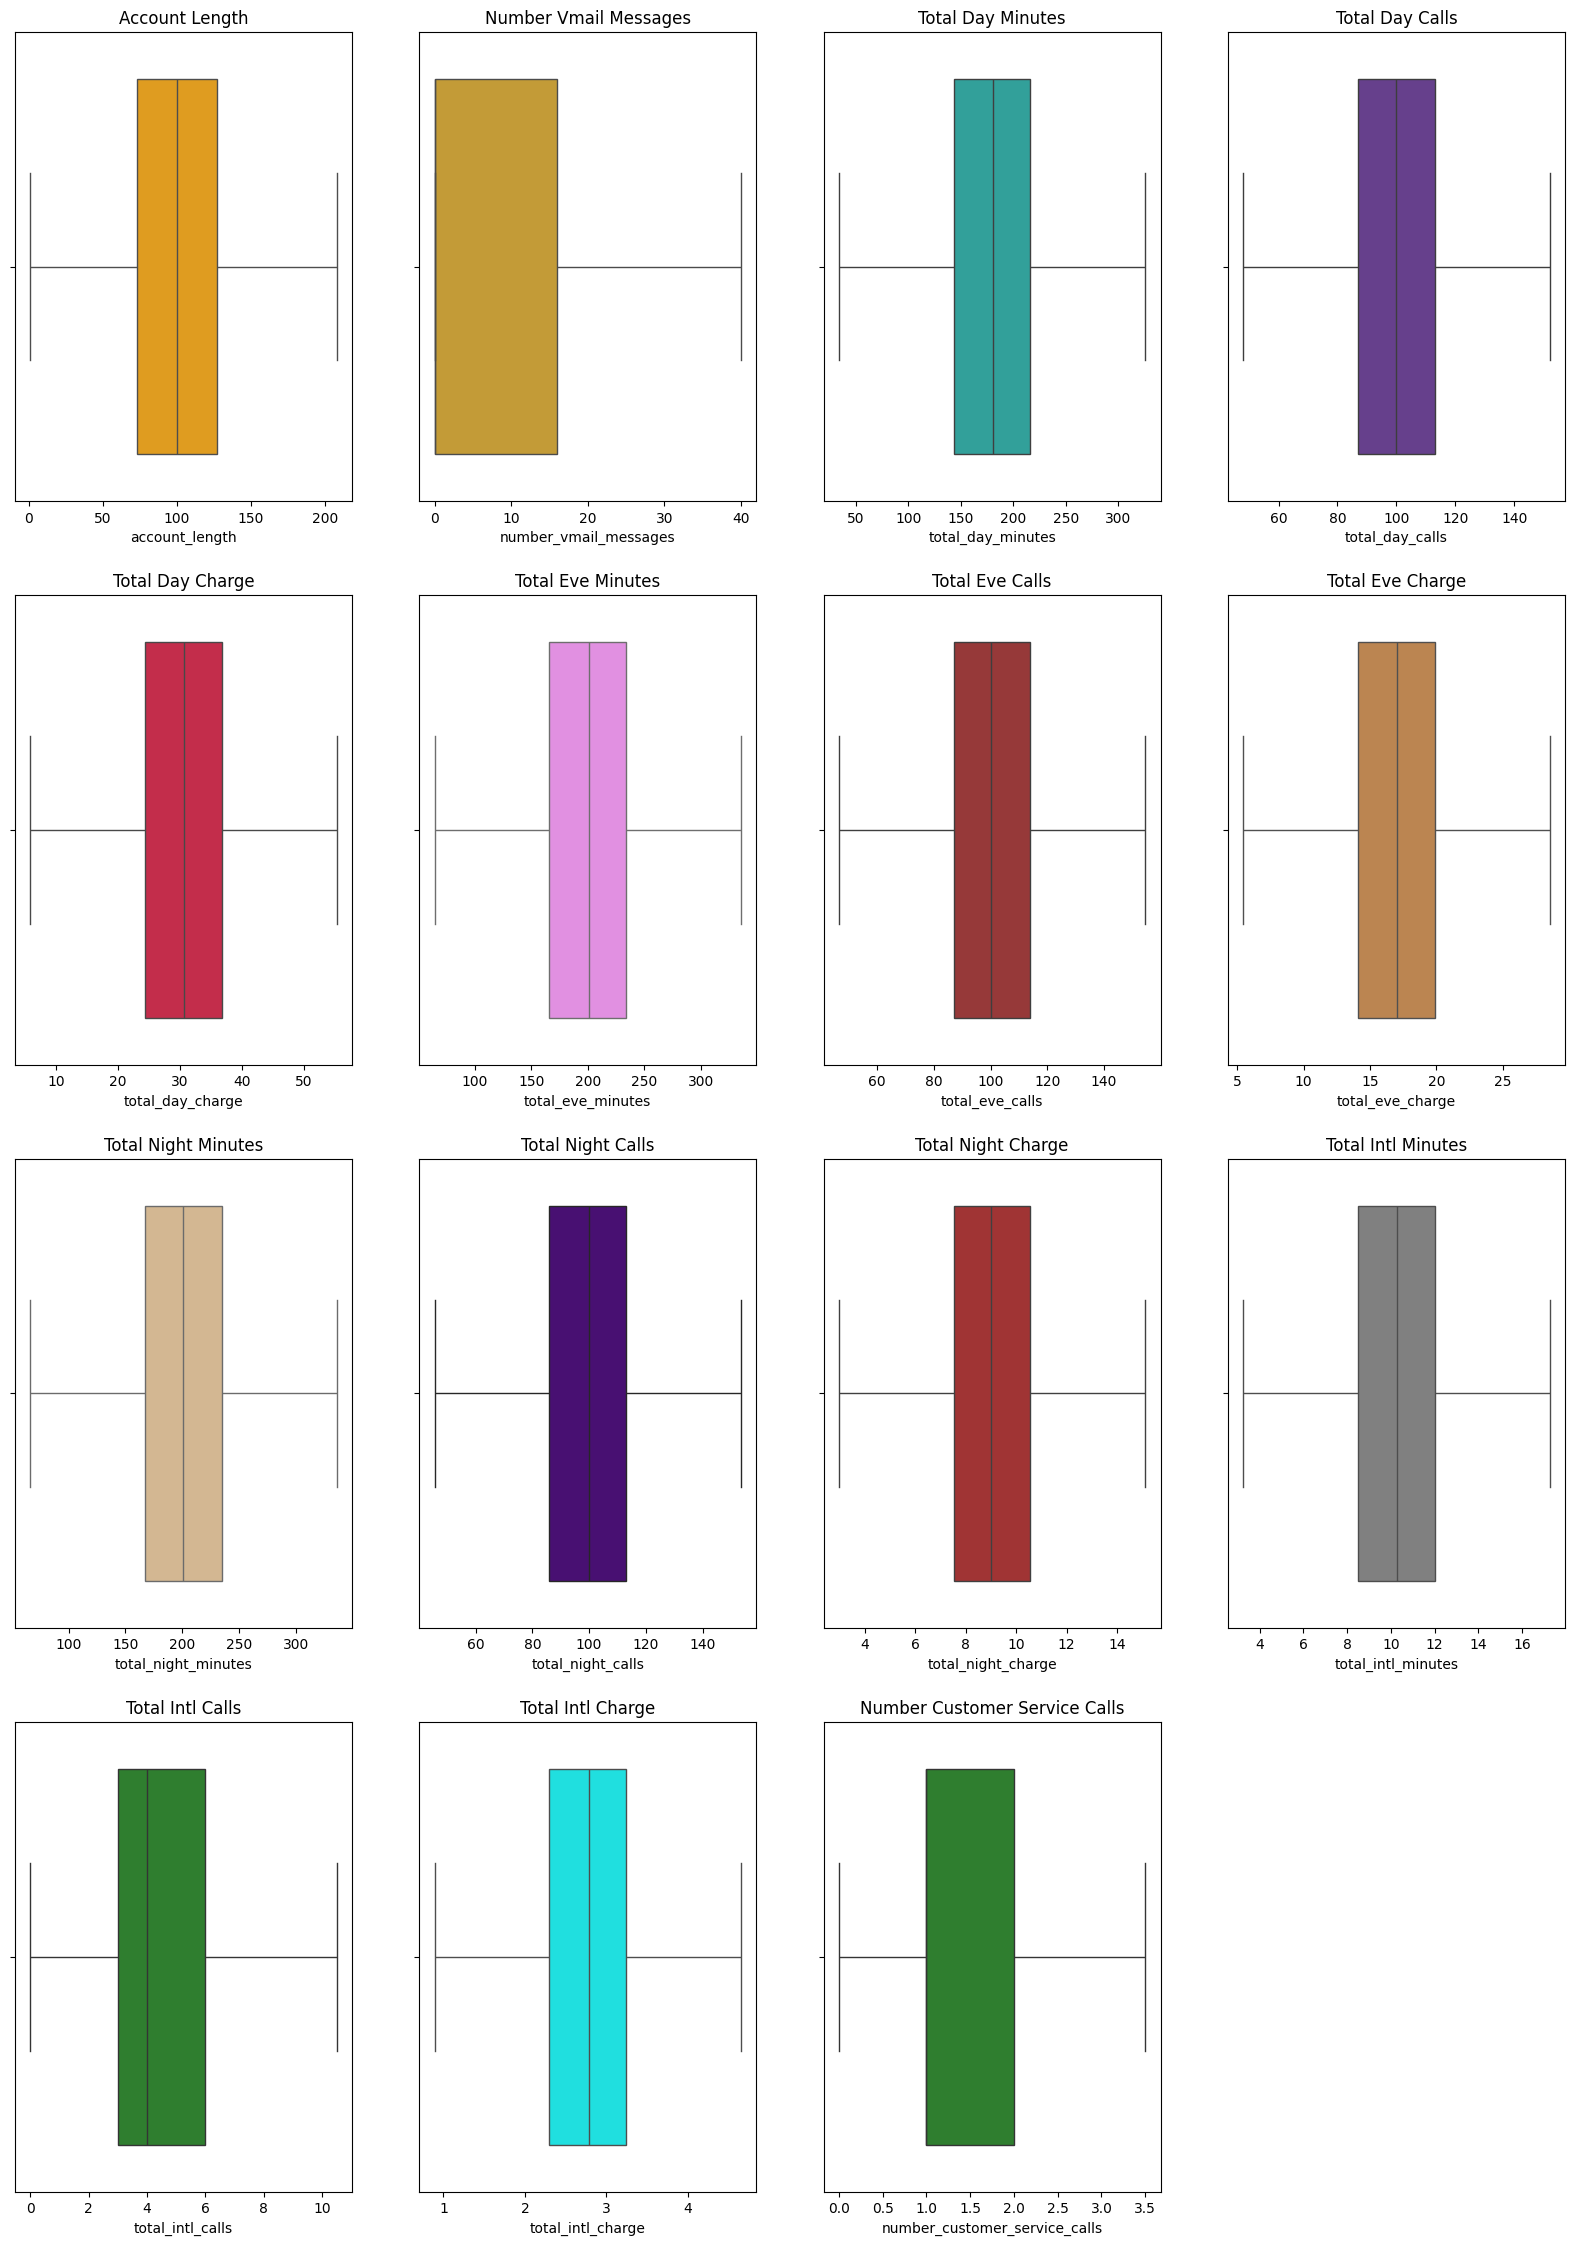

In [112]:
fig = plt.figure(figsize=[20,50])
for i ,col in enumerate(train_num):
    ax = fig.add_subplot(7,4, i+1)
    ax = sns.boxplot(data = df, x=col, color=colour_list[i])
    title = re.sub('_', ' ', col.title())
    ax.set_title(title)
    ax.set_xlabel(col)

In [113]:
df_cat = df[['international_plan', 'voice_mail_plan', 'churn']].replace({'yes': 1, 'no': 0})

/tmp/ipython-input-113-1507847854.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cat = df[['international_plan', 'voice_mail_plan', 'churn']].replace({'yes': 1, 'no': 0})


### Feature Engineer

In [114]:
total_minutes = train_num['total_day_minutes'] + train_num['total_eve_minutes'] + train_num['total_night_minutes']
total_charge = train_num['total_day_charge'] + train_num['total_eve_charge'] + train_num['total_night_charge']
total_calls = train_num['total_day_calls'] + train_num['total_eve_calls'] + train_num['total_night_calls']
train_num['total_minutes'] = total_minutes
train_num['total_charge'] = total_charge
train_num['total_calls'] = total_calls

In [115]:
train_num.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
                'total_day_charge', 'total_eve_charge', 'total_night_charge',
                'total_day_calls', 'total_eve_calls', 'total_night_calls'], axis=1, inplace=True)

In [116]:
train_num.head()

,account_length,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_charge,total_calls
0,107,26,13.7,3,3.70,1,611.5,55.54,329
1,137,0,12.2,5,3.29,0,527.2,59.00,328
2,84,0,6.6,7,1.78,2,558.2,65.02,248
3,75,0,10.1,3,2.73,3,501.9,49.36,356
4,121,24,7.5,7,2.03,3,779.3,76.28,314


## Encoding Categorico

In [117]:
from sklearn.preprocessing import OneHotEncoder

In [118]:
# One-hot encode categorical columns
categorical_cols = ['state', 'area_code']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_train = encoder.fit_transform(df[categorical_cols])
encoded_df_train = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)

### Concatenacion Numericos and columnas encodeadas

In [119]:
df = pd.concat([train_num, encoded_df_train, df_cat], axis=1)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   number_vmail_messages          4250 non-null   int64  
 2   total_intl_minutes             4250 non-null   float64
 3   total_intl_calls               4250 non-null   int64  
 4   total_intl_charge              4250 non-null   float64
 5   number_customer_service_calls  4250 non-null   int64  
 6   total_minutes                  4250 non-null   float64
 7   total_charge                   4250 non-null   float64
 8   total_calls                    4250 non-null   int64  
 9   state_AK                       4250 non-null   float64
 10  state_AL                       4250 non-null   float64
 11  state_AR                       4250 non-null   float64
 12  state_AZ                       4250 non-null   f

_apartado especial: se puede hacer un feature eng por medio de metodos de RFE, Boruta o Variance Threshold_

In [121]:
X = df.drop(['churn'], axis=1)
y = df['churn']

## Split Features -> TRAIN - VALIDATION - TEST

In [122]:
# Train/Validation/Test Split - Split X and y directly
from sklearn.model_selection import train_test_split

In [123]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, shuffle=True)

## TRAIN

In [124]:
print(y_train.shape)
print(X_train.shape)

(2231,)
(2231, 65)


## TEST

In [125]:
print(y_test.shape)
print(X_test.shape)

(1275,)
(1275, 65)


## VALIDATION

In [126]:
print(y_validation.shape)
print(X_validation.shape)

(744,)
(744, 65)


---

# MODELOS A USAR

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

In [128]:
# Funcion para poder pasar de manera generica modelos y metricas necesarias
# Función mejorada para evaluación de modelos
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    # Entrenar modelo
    model.fit(X_train, y_train)

    # Predecir en validation
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    # Métricas
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba) if y_pred_proba is not None else None

    # Matriz de confusión
    cm = confusion_matrix(y_val, y_pred)

    # Reporte de clasificación
    report = classification_report(y_val, y_pred)

    # Resultados
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(report)

    # Visualización
    plt.figure(figsize=(15, 5))

    # Matriz de confusión
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Curva ROC
    if y_pred_proba is not None:
        plt.subplot(1, 2, 2)
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                 label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    return {
        'model': model_name,
        'accuracy': accuracy,
        'f1': f1,
        'roc_auc': roc_auc,
        'model_obj': model
    }


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curves(models, X_train, y_train, X_val, y_val):
    plt.figure(figsize=(10, 8))

    # Binarizar las etiquetas para multiclass
    y_val_bin = label_binarize(y_val, classes=[0, 1])

    for name, model in models.items():
        model.fit(X_train, y_train)

        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_val)[:, 1]
        else:
            y_score = model.decision_function(X_val)

        # Calcular curva ROC
        fpr, tpr, _ = roc_curve(y_val, y_score)
        roc_auc = auc(fpr, tpr)

        # Plot curva ROC
        plt.plot(fpr, tpr, lw=2,
                 label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curvas ROC de los Modelos')
    plt.legend(loc="lower right")
    plt.show()



In [129]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "SVM": SVC(probability=True, random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced')
}


Decision Tree (RFE) Performance:
Accuracy: 0.9503
F1 Score: 0.8141
ROC AUC: 0.8978

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       646
           1       0.80      0.83      0.81        98

    accuracy                           0.95       744
   macro avg       0.89      0.90      0.89       744
weighted avg       0.95      0.95      0.95       744



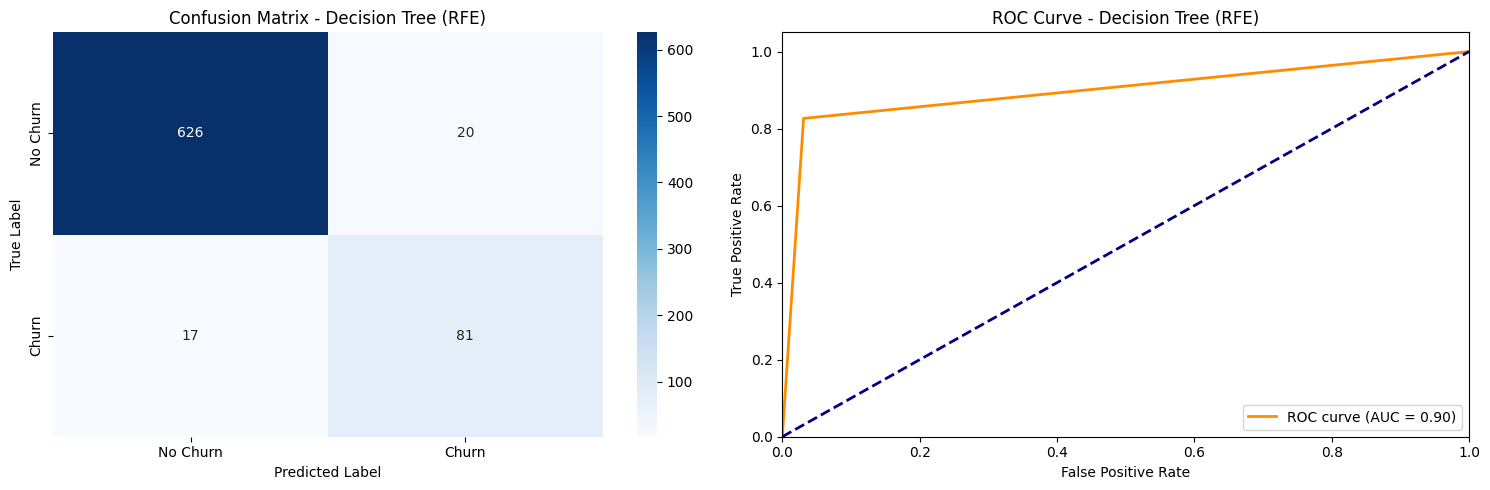


SVM (RFE) Performance:
Accuracy: 0.8320
F1 Score: 0.3961
ROC AUC: 0.6182

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       646
           1       0.38      0.42      0.40        98

    accuracy                           0.83       744
   macro avg       0.64      0.66      0.65       744
weighted avg       0.84      0.83      0.84       744



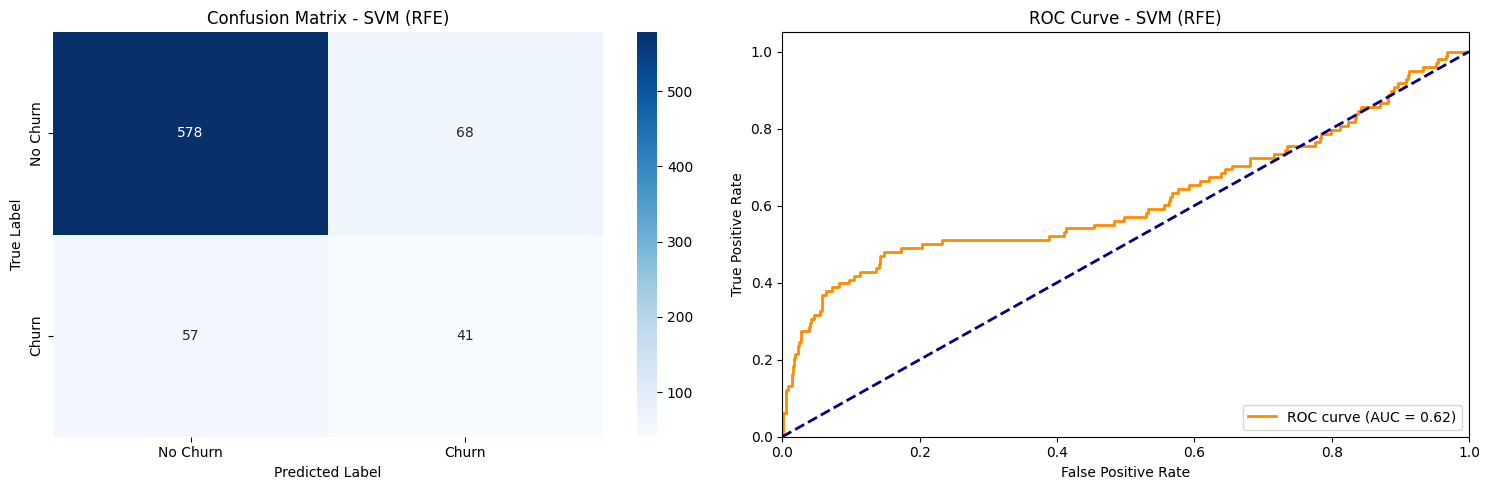

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression (RFE) Performance:
Accuracy: 0.7567
F1 Score: 0.4290
ROC AUC: 0.7825

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       646
           1       0.31      0.69      0.43        98

    accuracy                           0.76       744
   macro avg       0.63      0.73      0.64       744
weighted avg       0.86      0.76      0.79       744



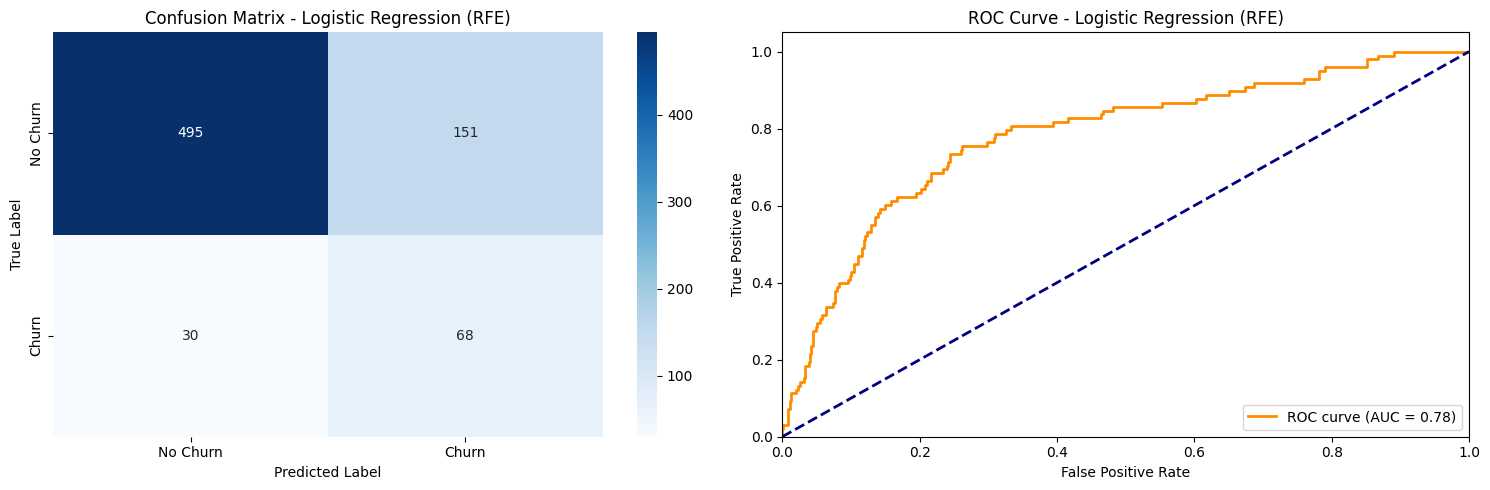


KNN (RFE) Performance:
Accuracy: 0.8777
F1 Score: 0.3546
ROC AUC: 0.6766

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       646
           1       0.58      0.26      0.35        98

    accuracy                           0.88       744
   macro avg       0.74      0.61      0.64       744
weighted avg       0.85      0.88      0.86       744



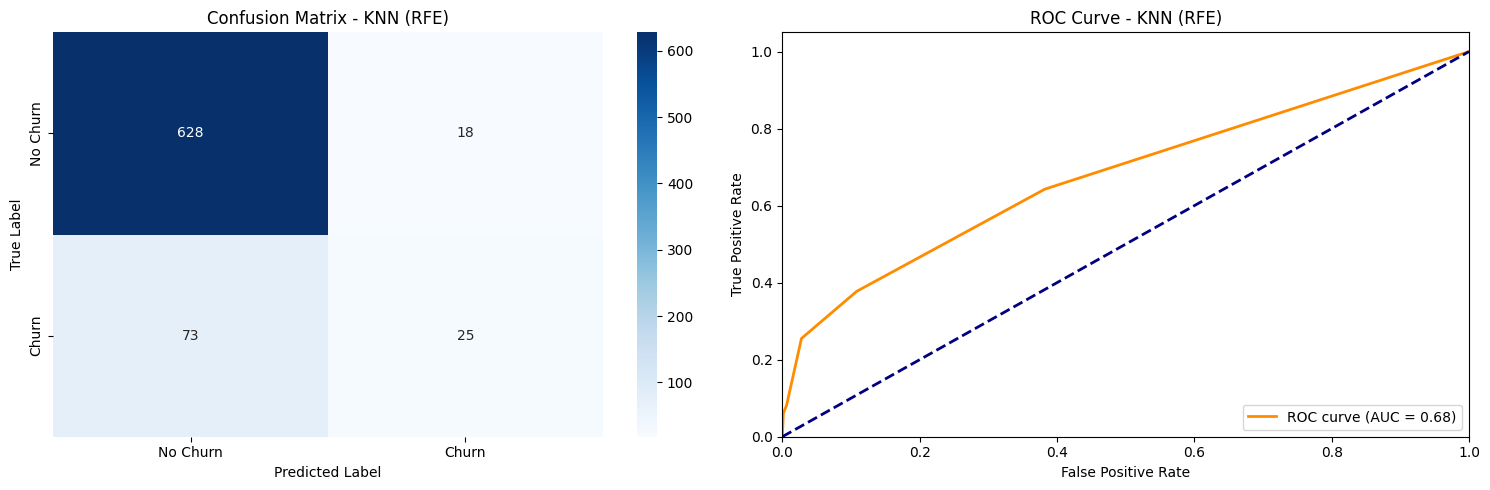


Random Forest (RFE) Performance:
Accuracy: 0.9556
F1 Score: 0.8000
ROC AUC: 0.9040

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       646
           1       0.99      0.67      0.80        98

    accuracy                           0.96       744
   macro avg       0.97      0.84      0.89       744
weighted avg       0.96      0.96      0.95       744



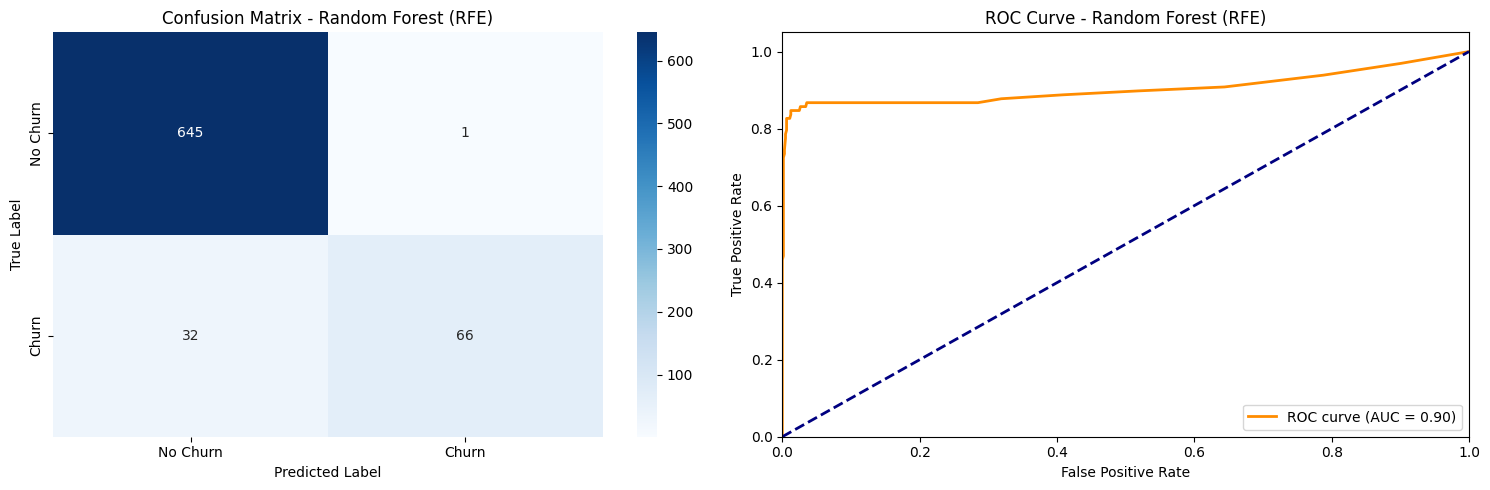


Model Comparison with Enhanced Evaluation (RFE features):
                       model  accuracy        f1   roc_auc
0        Decision Tree (RFE)  0.950269  0.814070  0.897785
1                  SVM (RFE)  0.831989  0.396135  0.618232
2  Logistic Regression (RFE)  0.756720  0.429022  0.782476
3                  KNN (RFE)  0.877688  0.354610  0.676636
4        Random Forest (RFE)  0.955645  0.800000  0.903954


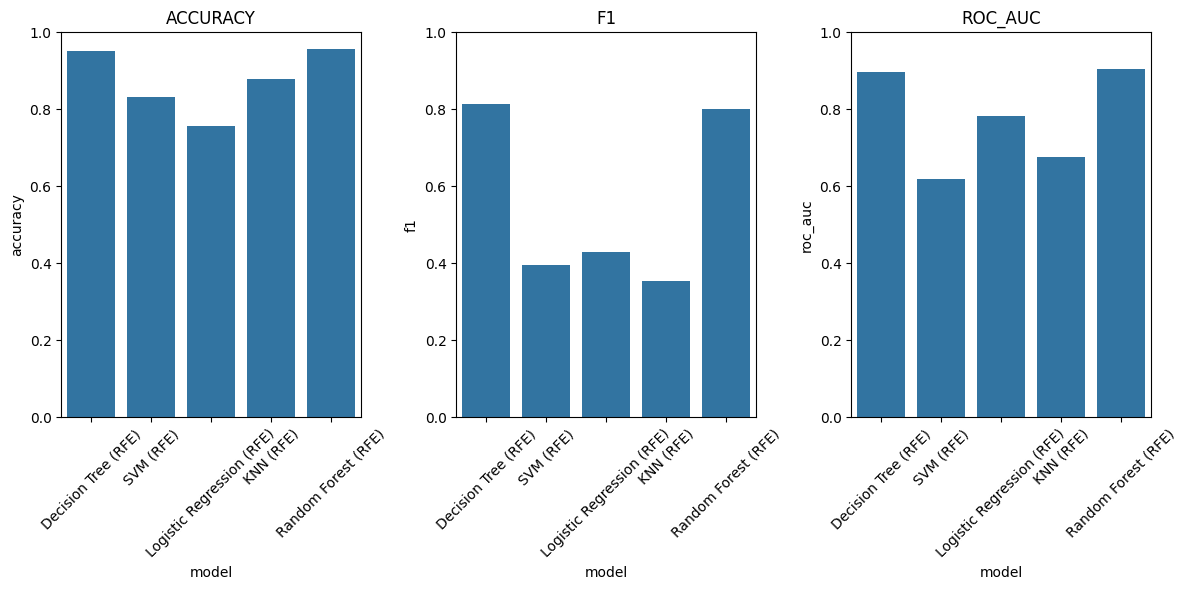

In [130]:
results = []
for name, model in models.items():
    result = evaluate_model(model, X_train, y_train, X_validation, y_validation, f"{name} (RFE)")
    results.append(result)


# Crear DataFrame con resultados mejorados
results_df = pd.DataFrame(results)
print("\nModel Comparison with Enhanced Evaluation (RFE features):")
print(results_df[['model', 'accuracy', 'f1', 'roc_auc']])

# Comparar métricas visualmente
metrics = ['accuracy', 'f1', 'roc_auc']
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=results_df, x='model', y=metric)
    plt.title(metric.upper())
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [131]:
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score

def evaluate_model_on_test(model, X_train, y_train, X_test, y_test, model_name):
    # Entrenar modelo (si no está ya entrenado)
    if not hasattr(model, 'classes_'):
        model.fit(X_train, y_train)

    # Predecir en test
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Reporte de clasificación
    report = classification_report(y_test, y_pred)

    # Resultados
    print(f"\n{model_name} Performance on Test Set:")
    print("="*50)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(report)

    # Visualización
    plt.figure(figsize=(15, 5))

    # Matriz de confusión
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {model_name} (Test)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Curva ROC
    if y_pred_proba is not None:
        plt.subplot(1, 2, 2)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                 label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name} (Test)')
        plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    return {
        'model': model_name,
        'accuracy': accuracy,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'classification_report': report
    }



Evaluating Decision Tree (RFE) on test set...

Decision Tree (RFE) Performance on Test Set:
Accuracy: 0.9467
F1 Score: 0.8256
ROC AUC: 0.8971

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1080
           1       0.83      0.83      0.83       195

    accuracy                           0.95      1275
   macro avg       0.90      0.90      0.90      1275
weighted avg       0.95      0.95      0.95      1275



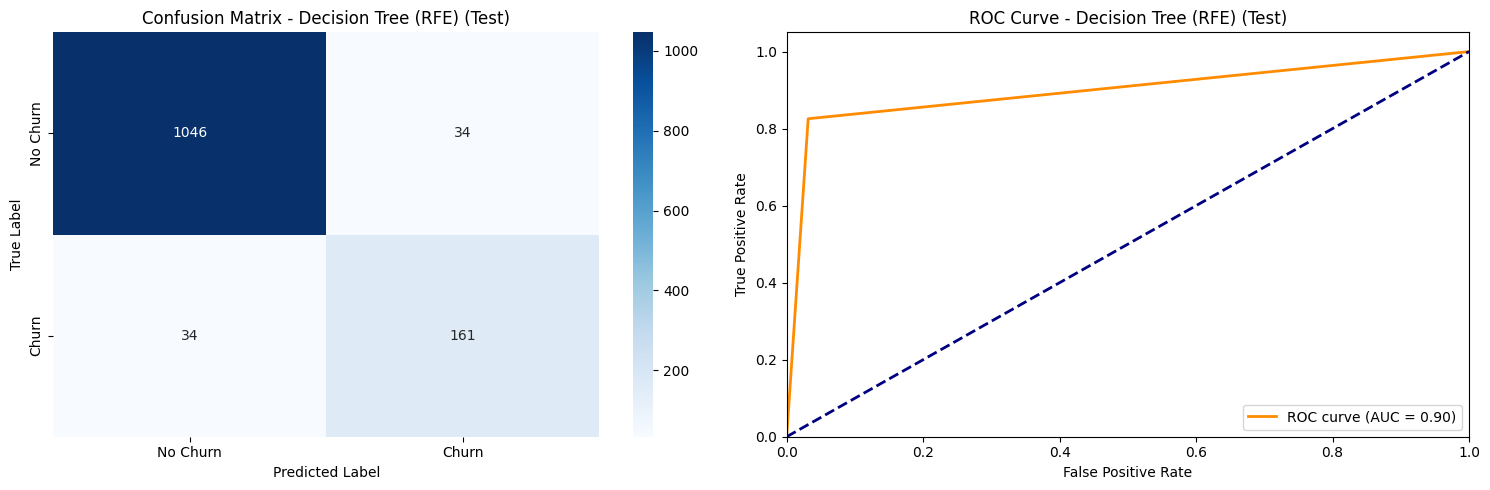


Evaluating SVM (RFE) on test set...

SVM (RFE) Performance on Test Set:
Accuracy: 0.8157
F1 Score: 0.4418
ROC AUC: 0.6528

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1080
           1       0.41      0.48      0.44       195

    accuracy                           0.82      1275
   macro avg       0.66      0.68      0.67      1275
weighted avg       0.83      0.82      0.82      1275



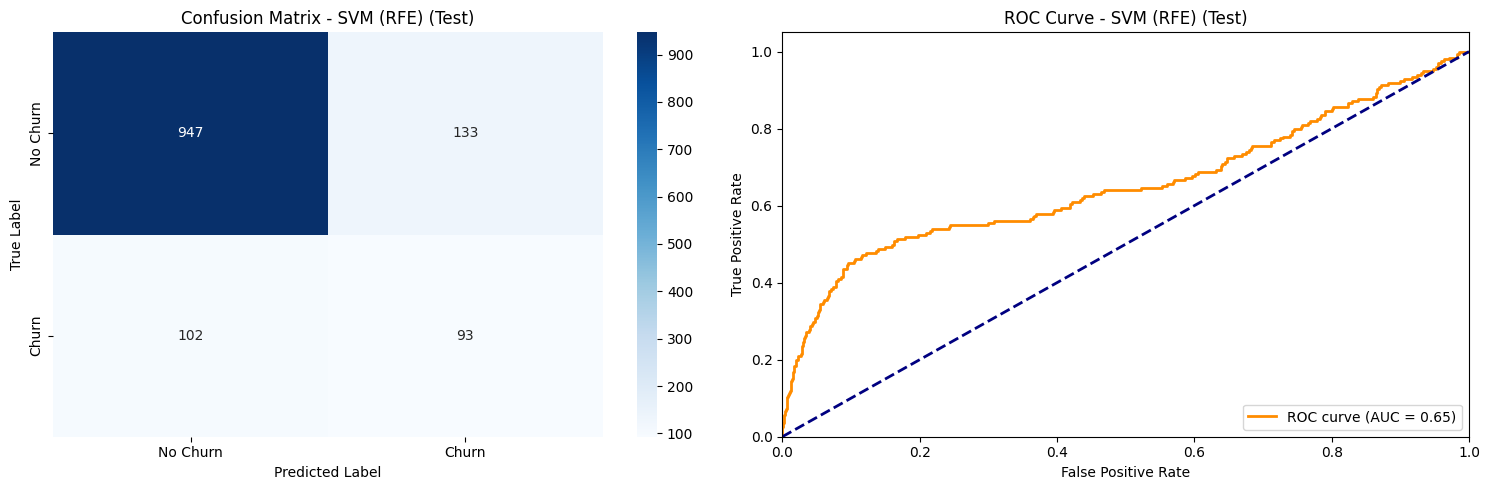


Evaluating Logistic Regression (RFE) on test set...

Logistic Regression (RFE) Performance on Test Set:
Accuracy: 0.7522
F1 Score: 0.4589
ROC AUC: 0.8016

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1080
           1       0.34      0.69      0.46       195

    accuracy                           0.75      1275
   macro avg       0.64      0.73      0.65      1275
weighted avg       0.84      0.75      0.78      1275



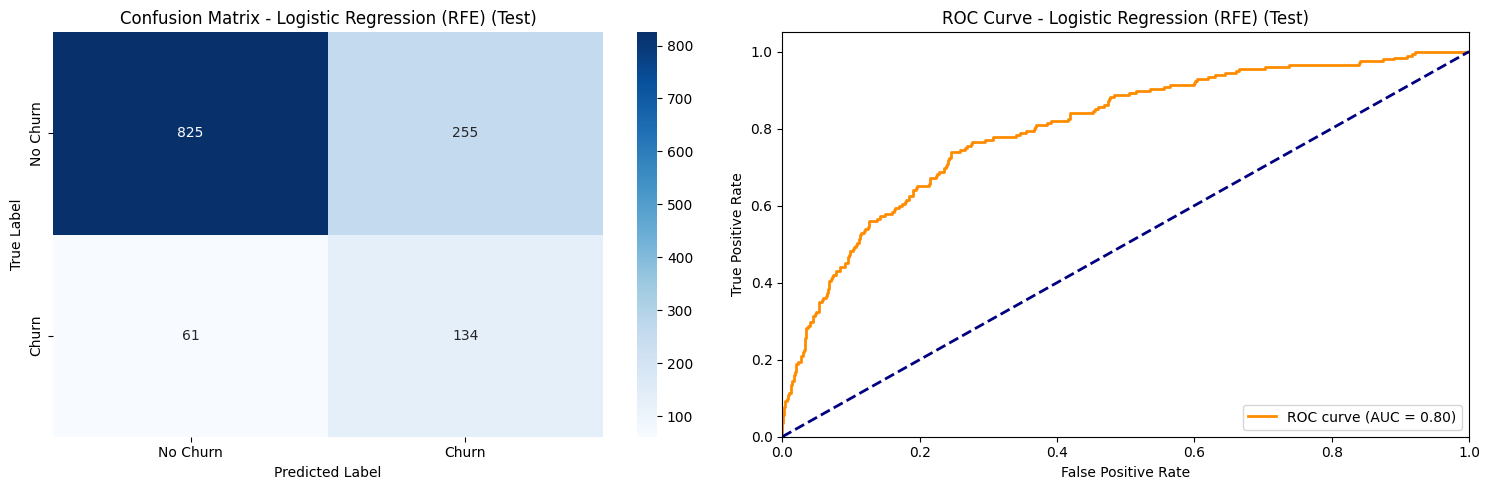


Evaluating KNN (RFE) on test set...

KNN (RFE) Performance on Test Set:
Accuracy: 0.8620
F1 Score: 0.3623
ROC AUC: 0.6759

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1080
           1       0.62      0.26      0.36       195

    accuracy                           0.86      1275
   macro avg       0.75      0.61      0.64      1275
weighted avg       0.84      0.86      0.84      1275



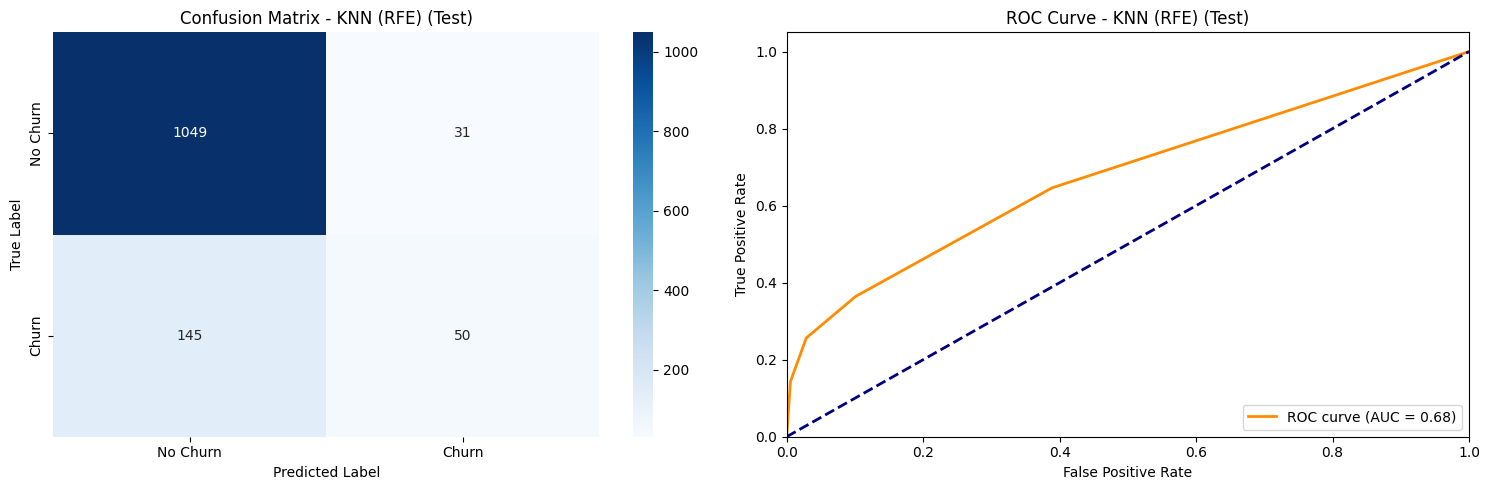


Evaluating Random Forest (RFE) on test set...

Random Forest (RFE) Performance on Test Set:
Accuracy: 0.9514
F1 Score: 0.8144
ROC AUC: 0.9300

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1080
           1       0.98      0.70      0.81       195

    accuracy                           0.95      1275
   macro avg       0.96      0.85      0.89      1275
weighted avg       0.95      0.95      0.95      1275



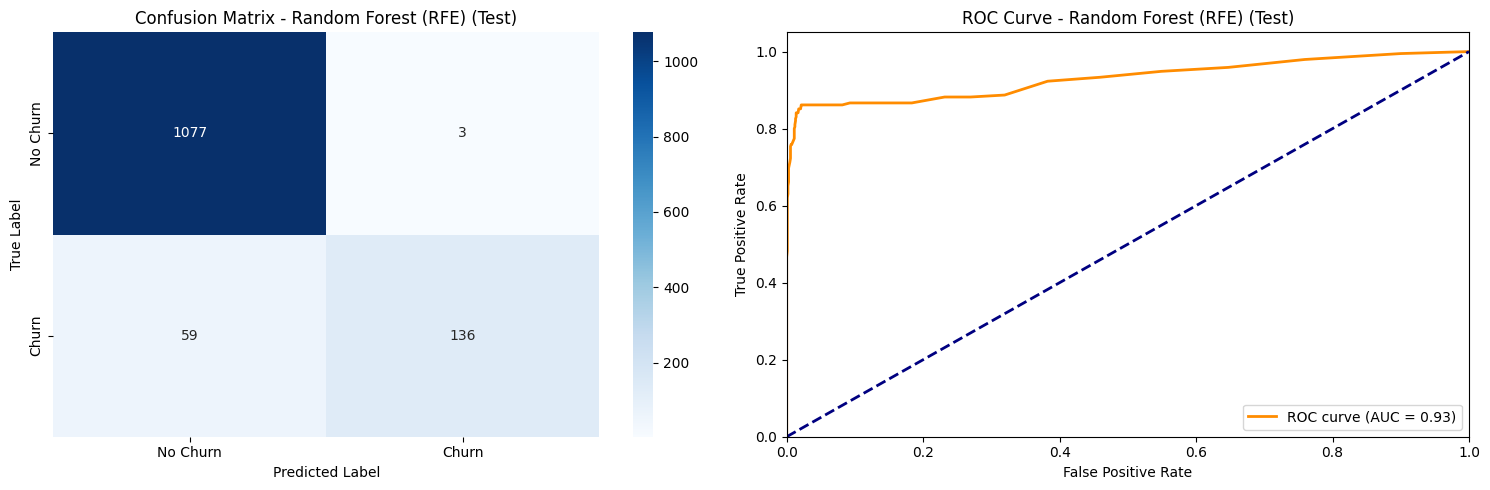

In [132]:
# Asumiendo que:
# - models es tu diccionario de modelos
# - results contiene los resultados de validación
# - X_train, y_train son los datos de entrenamiento
# - X_test, y_test son los datos de test

test_results = []

for model_info in results:
    model_name = model_info['model']
    model = model_info['model_obj']

    print(f"\nEvaluating {model_name} on test set...")
    test_result = evaluate_model_on_test(
        model=model,
        X_train=X_train,  # o X_train_rfe si usaste selección de características
        y_train=y_train,
        X_test=X_test,    # o X_test_rfe
        y_test=y_test,
        model_name=model_name
    )
    test_results.append(test_result)


Comparación entre Validación y Test:
                           accuracy                   f1              roc_auc  \
dataset                        test validation      test validation      test   
model                                                                           
Decision Tree (RFE)        0.946667   0.950269  0.825641   0.814070  0.897080   
KNN (RFE)                  0.861961   0.877688  0.362319   0.354610  0.675890   
Logistic Regression (RFE)  0.752157   0.756720  0.458904   0.429022  0.801614   
Random Forest (RFE)        0.951373   0.955645  0.814371   0.800000  0.930021   
SVM (RFE)                  0.815686   0.831989  0.441805   0.396135  0.652811   

                                      
dataset                   validation  
model                                 
Decision Tree (RFE)         0.897785  
KNN (RFE)                   0.676636  
Logistic Regression (RFE)   0.782476  
Random Forest (RFE)         0.903954  
SVM (RFE)                   0.618232  


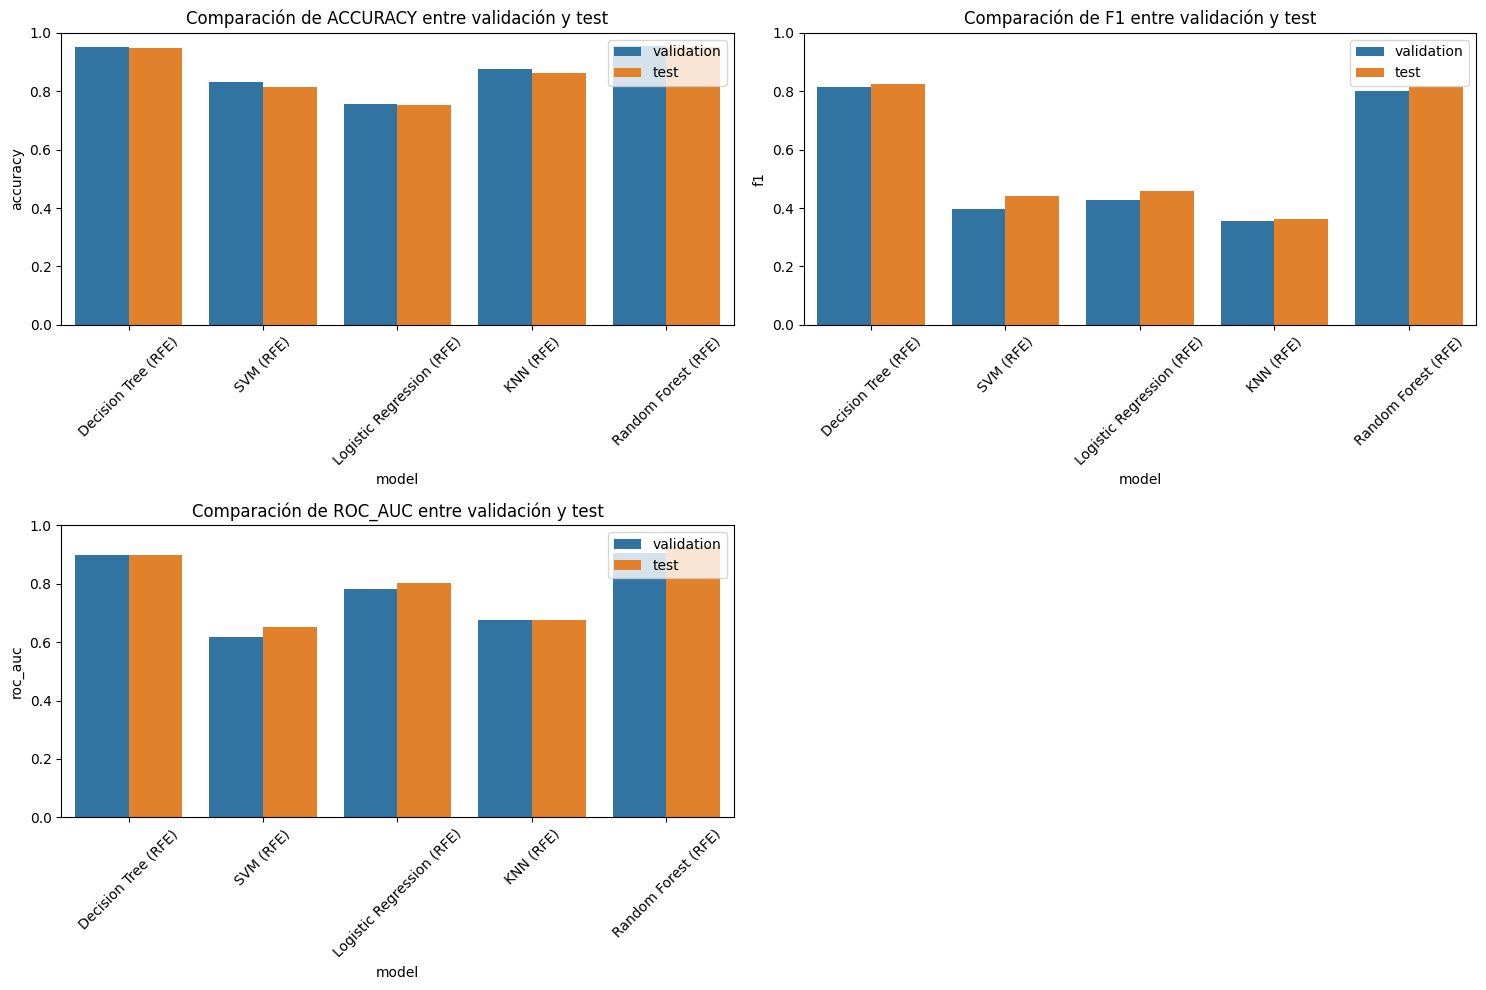

In [133]:
# Crear DataFrames comparativos
validation_df = pd.DataFrame(results)[['model', 'accuracy', 'f1', 'roc_auc']]
validation_df['dataset'] = 'validation'

test_df = pd.DataFrame(test_results)[['model', 'accuracy', 'f1', 'roc_auc']]
test_df['dataset'] = 'test'

comparison_df = pd.concat([validation_df, test_df]).reset_index(drop=True)

# Mostrar comparación
print("\nComparación entre Validación y Test:")
print(comparison_df.pivot(index='model', columns='dataset'))

# Visualización comparativa
plt.figure(figsize=(15, 10))
metrics = ['accuracy', 'f1', 'roc_auc']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=comparison_df, x='model', y=metric, hue='dataset')
    plt.title(f'Comparación de {metric.upper()} entre validación y test')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [134]:
# Identificar el mejor modelo en test
best_test_model_info = max(test_results, key=lambda x: x['f1'])

print("\nMejor modelo en test:")
print(f"Modelo: {best_test_model_info['model']}")
print(f"F1-score: {best_test_model_info['f1']:.4f}")
print(f"ROC-AUC: {best_test_model_info['roc_auc']:.4f}")

# Análisis detallado de la matriz de confusión del mejor modelo
best_cm = best_test_model_info['confusion_matrix']
tn, fp, fn, tp = best_cm.ravel()

print("\nAnálisis de la matriz de confusión:")
print(f"Verdaderos Negativos: {tn}")
print(f"Falsos Positivos: {fp}")
print(f"Falsos Negativos: {fn}")
print(f"Verdaderos Positivos: {tp}")

# Calcular tasas importantes
total = tn + fp + fn + tp
print(f"\nTasa de Falsos Positivos: {fp/(fp+tn):.4f}")
print(f"Tasa de Falsos Negativos: {fn/(fn+tp):.4f}")
print(f"Precisión (Churn): {tp/(tp+fp):.4f}")
print(f"Sensibilidad (Recall): {tp/(tp+fn):.4f}")


Mejor modelo en test:
Modelo: Decision Tree (RFE)
F1-score: 0.8256
ROC-AUC: 0.8971

Análisis de la matriz de confusión:
Verdaderos Negativos: 1046
Falsos Positivos: 34
Falsos Negativos: 34
Verdaderos Positivos: 161

Tasa de Falsos Positivos: 0.0315
Tasa de Falsos Negativos: 0.1744
Precisión (Churn): 0.8256
Sensibilidad (Recall): 0.8256



## Interpretación de los Resultados

### Consistencia del Modelo
- **Buen rendimiento**:  
  ✔️ Métricas similares en _test_ y _validación_ → Modelo generaliza bien  
  ❌ Grandes diferencias pueden indicar:  
  - Sobreajuste (_overfitting_)  
  - Problemas en la división de los datos  

### Matriz de Confusión  
Componentes clave:  

| Tipo               | Descripción                                  | Impacto                          |
|--------------------|---------------------------------------------|----------------------------------|
| **Verdaderos Negativos (TN)** | Clientes predichos correctamente como no _churn_ | -                                |
| **Falsos Positivos (FP)**     | Clientes predichos como _churn_ que **no** lo son | Error costoso (ej: descuentos innecesarios) |
| **Falsos Negativos (FN)**     | Clientes predichos como no _churn_ que **sí** abandonan | Oportunidad perdida (ej: no se aplican retenciones) |
| **Verdaderos Positivos (TP)** | Clientes predichos correctamente como _churn_  | -                                |

### Curva ROC y AUC  
**Interpretación del AUC (Área bajo la curva)**:  
- **≥ 0.9**: Capacidad de discriminación excelente ★  
- **0.7 - 0.8**: Buen rendimiento ✓  
- **≈ 0.5**: No mejor que un modelo aleatorio ✗  
- **< 0.5**: Rendimiento peor que el azar (revisar urgentemente) ⚠️  

**Nota**: La curva ROC muestra el equilibrio entre _TPR_ (tasa de verdaderos positivos) y _FPR_ (tasa de falsos positivos) para distintos umbrales de clasificación.  


## Métricas de Evaluación en Clasificación

### 1. Curva ROC (Receiver Operating Characteristic)
- **Qué es**: Gráfico que muestra el rendimiento de un modelo clasificador para todos los umbrales de decisión posibles.
- **Ejes**:
  - **Eje X**: Tasa de Falsos Positivos (FPR = FP / (FP + TN))
  - **Eje Y**: Tasa de Verdaderos Positivos (TPR = Recall = TP / (TP + FN))
- **AUC (Area Under Curve)**:
  - Mide la capacidad del modelo para distinguir entre clases (0 = peor que azar, 0.5 = azar, 1 = perfecto)
  - Ejemplo: AUC 0.85 → 85% de probabilidad de que el modelo distinga un positivo de un negativo

### 2. Accuracy (Exactitud)
- **Fórmula**: (TP + TN) / (TP + TN + FP + FN)
- **Interpretación**: Porcentaje de predicciones correctas sobre el total
- **Limitaciones**: Engañosa en datasets desbalanceados
- **Ejemplo**: En 100 muestras (90 negativas, 10 positivas):
  - Modelo que siempre predice negativo tendría 90% accuracy (pero es inútil)

### 3. Precision (Precisión)
- **Fórmula**: TP / (TP + FP)
- **Interpretación**: De todos los que predije como positivos, ¿cuántos realmente lo son?
- **Importancia**: Crítica cuando los FP son costosos (ej: diagnóstico médico)
- **Ejemplo**:
  - FP = enviar descuentos a clientes que no iban a dejar el servicio (churn)

### 4. Recall (Sensibilidad)
- **Fórmula**: TP / (TP + FN)
- **Sinónimos**: Sensitivity, True Positive Rate
- **Interpretación**: De todos los reales positivos, ¿cuántos detecté?
- **Importancia**: Crítico cuando los FN son peligrosos (ej: detectar fraudes)
- **Ejemplo**:
  - FN = no detectar clientes que sí iban a dejar el servicio

### 5. F1-Score
- **Qué es**: Media armónica entre Precision y Recall (balancea ambas métricas)
- **Fórmula**: 2 * (Precision * Recall) / (Precision + Recall)
- **Rango**: 0 (peor) a 1 (mejor)
- **Uso ideal**:
  - Cuando hay desbalance de clases
  - Cuando tanto FP como FN son importantes
- **Ejemplo práctico**:
  - Precision = 0.8, Recall = 0.6 → F1 = 0.69

### Comparativa Visual
| Métrica       | Enfoque                     | Ideal para...                  | Sensible a...         |
|---------------|-----------------------------|--------------------------------|-----------------------|
| **Accuracy**  | Predicciones correctas      | Datasets balanceados           | Desbalance de clases  |
| **Precision** | Errores tipo FP             | Minimizar falsas alarmas       | Alto número de FP     |
| **Recall**    | Errores tipo FN             | Capturar todos los positivos   | Alto número de FN     |
| **F1-Score**  | Balance FP/FN               | Situaciones equilibradas       | Ambos tipos de error  |
| **AUC-ROC**   | Rendimiento en todos los umbrales | Evaluación general          | Distribución de clases|
